Completed by: Koh Aik Hong (1005139)

In [1]:
from IPython.display import display, Image

# Logistic Regression [25 points]

Consider 13 data points from a 2-d space where each point is of the form $x = (x_1, x_2)$, as shown in Figure 1. Now we want to train a logistic regression classifier based on the given data. Suppose the hypothesis function of the logistic regression is $h_θ(x) = g(θ_0 + θ_1x_1 + θ_2x_2)$ where $g(z)$ is the logistic function, and parameter vector $θ = [θ_0, θ_1, θ_2]^T$ is initialized as $[0, −1, 1]^T$.

Please write a function implementing gradient descent (simultaneously updating all the parameters, i.e., $θ_0, θ_1, θ_2$) to find suitable parameters for the hypothesis function. We set the learning rate as α = 0.1 and run the gradient descent for 150 iterations. Plot the training loss over the 150 iterations using a line plot and write down the final decision boundary.

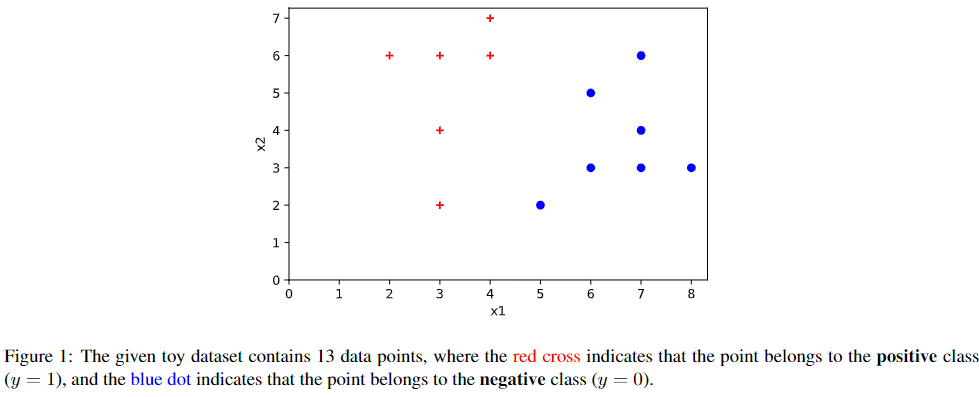

In [2]:
display(Image(filename="fig_1.png"))

In [4]:
dataset = [
  [4,7,1],
  [2,6,1],
  [3,6,1],
  [4,6,1],
  [3,4,1],
  [3,2,1],
  [7,6,0],
  [6,5,0],
  [7,4,0],
  [8,3,0],
  [7,3,0],
  [6,3,0],
  [5,2,0]
]

In [5]:
import numpy as np

# Convert dataset to numpy array
dataset = np.array(dataset)
X = dataset[:,:-1]
y = dataset[:,-1]

# insert a column of ones to X
X = np.append(np.ones((X.shape[0],1)),X, axis=1)
print("X = ")
print(X[0:3],"\n")
print("y = ")
print(y[0:3])

X = 
[[1. 4. 7.]
 [1. 2. 6.]
 [1. 3. 6.]] 

y = 
[1 1 1]


In [6]:
# implement the hypothesis function for logistic regression
def hypothesis_function(x, w):
  z = x @ w
  return 1/(1+np.exp(-z))

In [7]:
# implement the cost function for logistic regression
def cost_function(x, y, w):
  n = x.shape[0]
  h = hypothesis_function(x,w)
  cost = -1/n * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
  return cost

In [8]:
def gradient_descent(X, y, w, alpha, iterations):
  # add in the initial loss
  n = X.shape[0]
  losses = np.zeros(iterations+1)
  # add in initial loss before starting gradient descent
  losses[0] = cost_function(X,y,w)
  for i in range(iterations):
    h = hypothesis_function(X,w)
    # using the gradient update rule in the slides without the 1/n according to clarifications with prof Zhao Na
    w = w - alpha * (h - y)@ X
    loss = cost_function(X,y,w)
    losses[i+1] = loss

  return w, losses

In [9]:
# initialize the weights
initial_w = np.array([0,-1,1])
print("initial weights: ",initial_w)

# train the model
w, losses = gradient_descent(X, y, initial_w, 0.1, 150)
print("final weights: ",w)

initial weights:  [ 0 -1  1]
final weights:  [ 5.17186191 -2.41702311  1.44246911]


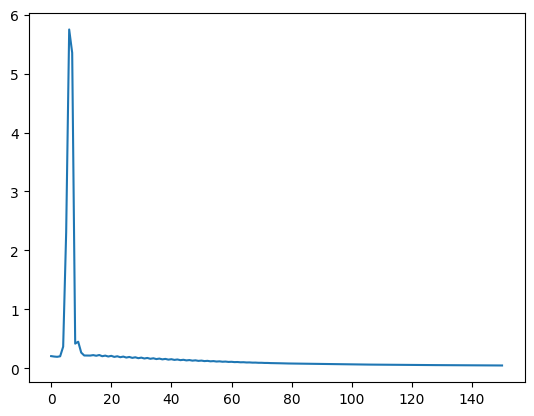

In [10]:
# plot the iteration against losses
import matplotlib.pyplot as plt
plt.plot(losses)

## Final decision boundary:
$h_θ(x) = g(5.17186191 -2.41702311x_1 + 1.44246911x_2)$

# Neural Networks [40 points]
As shown in Figure 2, we are given a 3-layer neural network. Instead of incorporating the bias term into
the weight matrix $Θ_i$, we explicitly write the bias term, resulting in $z_2 = w_2a_1 + b_2$, where $w_2 ∈ R^{1×3}$ is the weight vector and $b_2 ∈ R$ is the bias term for the mapping function from the hidden layer to the output layer, respectively. The output of this neural network $\hat{y} = σ(z_2)$.

(1) [5 points] Write down the mathematical representation of $\frac{∂\hat{y}}{∂w_2}$ and $\frac{∂\hat{y}}{∂b_2}$.

(2) [5 points] Let us assume the activation function σ is the softplus function, please derive the closed-form
expression for calculating $\frac{∂\hat{y}}{∂w_2}$ and $\frac{∂\hat{y}}{∂b_2}$.

(3) [15 points] If we still use softplus as the activation function but change the value of the bias $b_2$, does $\frac{∂\hat{y}}{∂x}$ (x is the input to this 3-layer neural network) change? Please prove your answer. [Hint: the change of bias can be expressed as $∆b_2$]

(4) [15 points] Now let us assume that the activation function σ is the logistic function, please derive the
closed-form expression for calculating $\frac{∂\hat{y}}{∂w_1}$.

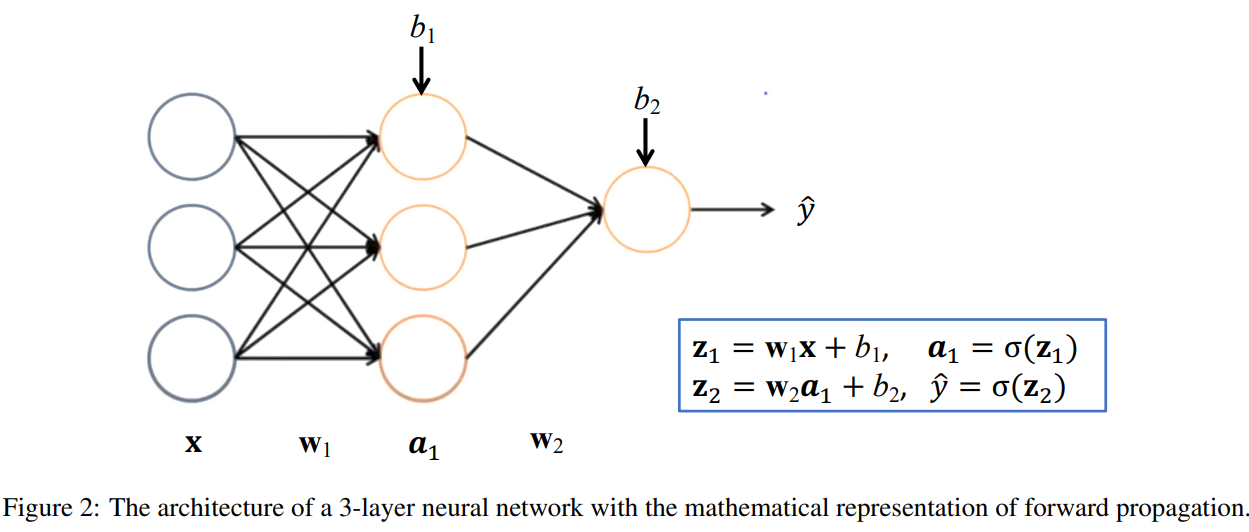

In [10]:
display(Image(filename="fig_2.png"))

## 2(1) Answer
Given: $\hat{y} = \sigma(z_2) = \sigma(w_2a_1+b_2) = \sigma(w_2(\sigma(w_1x+b_1) +b_2))$

$$\frac{∂\hat{y}}{∂w_2} = \frac{∂\hat{y}}{∂z_2}\frac{∂z_2}{∂w_2}$$

$$\frac{∂\hat{y}}{∂b_2} = \frac{∂\hat{y}}{∂z_2}\frac{∂z_2}{∂b_2}$$

## 2(2) Answer
Using the softplus function defined in the lecture slides:
$$\text{Softplus} (x) = \log (1 + \exp(x))$$
Given:
$$\sigma(z) = \text{Softplus} (z)$$
$$\hat{y} = \sigma(z_2)$$
$$\hat{y} = \log (1 + e^{z_2})$$

---

Calculating the derivative of the softplus function:
$$\frac{d}{dx}\text{Softplus}(x) = \frac{d}{dx}\log (1 + e^x)$$
$$\frac{d}{dx}\log (1 + e^x) = \frac{1}{1 + e^x} \cdot \frac{d}{dx}(1 + e^x)$$
$$\frac{1}{1 + e^x} \cdot \frac{d}{dx}(1 + e^x) = \frac{e^x}{1 + e^x}$$
$$\frac{e^x}{1 + e^x} = \frac{1}{1+e^{-x}}$$

Therefore, the derivative of the softplus function is the sigmoid function.

---

Calculating $\frac{∂\hat{y}}{∂z_2}$:
$$\frac{∂\hat{y}}{∂z_2} = \frac{∂}{∂z_2}\text{Softplus}(z_2) = \frac{1}{1+e^{-z_2}}$$
$$\frac{∂z_2}{∂b_2} = 1$$
$$\frac{∂\hat{y}}{∂b_2} = \frac{∂\hat{y}}{∂z_2}\frac{∂z_2}{∂b_2} = \frac{∂\hat{y}}{∂z_2} = \frac{1}{1+e^{-z_2}}$$

---

Calculating $\frac{∂\hat{y}}{∂w_2}$:
$$\frac{∂z_2}{∂w_2} = a_1$$
$$\frac{∂\hat{y}}{∂z_2} = \frac{∂}{∂z_2}\text{Softplus}(z_2) = \frac{1}{1+e^{-z_2}}$$
$$\frac{∂\hat{y}}{∂w_2} = \frac{∂\hat{y}}{∂z_2}\frac{∂z_2}{∂w_2} = \frac{a_1}{1+e^{-z_2}}$$



## 2(3) Answer
Given:
$$\sigma(z) = \text{Softplus} (z)$$

Calculating $\frac{∂\hat{y}}{∂x}$:
$$\frac{∂\hat{y}}{∂x} = \frac{∂\hat{y}}{∂z_2}\frac{∂z_2}{∂a_1}\frac{∂a_1}{∂z_1}\frac{∂z_1}{∂x}$$
$$\frac{∂\hat{y}}{∂z_2} = \frac{∂}{∂z_2}\text{Softplus}(z_2) = \frac{1}{1+e^{-z_2}}$$
$$\frac{∂z_2}{∂a_1} = w_2$$
$$\frac{∂a_1}{∂z_1} = \frac{∂}{∂z_1}\text{Softplus}(z_1) = \frac{1}{1+e^{-z_1}}$$
$$\frac{∂z_1}{∂x} = w_1$$
$$\frac{∂\hat{y}}{∂x} = \frac{w_2}{1+e^{-z_2}}\frac{w_1}{1+e^{-z_1}} = \frac{w_2}{1+e^{-(w_2x+b_2)}}\frac{w_1}{1+e^{-(w_1x+b_1)}}$$

Since $\frac{∂\hat{y}}{∂x}$ is dependent on the value of $b_2$ as shown above, **changing the value of $b_2$ will change $\frac{∂\hat{y}}{∂x}$**.


## 2(4) Answer
Given:
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

Calculating $\frac{∂\sigma(z)}{∂z}$:
$$\frac{∂\sigma(z)}{∂z} = \frac{∂}{∂z}(\frac{1}{1+e^{-z}})$$
$$\frac{∂}{∂z}(\frac{1}{1+e^{-z}}) = \frac{∂}{∂z}({1+e^{-z}})^{-1}$$
&ensp;&ensp; Using chain rule:
$$\frac{∂}{∂z}({1+e^{-z}})^{-1} = -({1+e^{-z}})^{-2} \cdot \frac{∂}{∂z}({1+e^{-z}})$$
$$-({1+e^{-z}})^{-2} \cdot \frac{∂}{∂z}({1+e^{-z}}) = -({1+e^{-z}})^{-2} \cdot \frac{∂}{∂z}({e^{-z}})$$
$$-({1+e^{-z}})^{-2} \cdot \frac{∂}{∂z}({e^{-z}}) = -({1+e^{-z}})^{-2} \cdot ({e^{-z}} \cdot \frac{∂}{∂z}(-z))$$
$$-({1+e^{-z}})^{-2} \cdot \frac{∂}{∂z}({e^{-z}}) = -({1+e^{-z}})^{-2} \cdot ({e^{-z}} \cdot \frac{∂}{∂z}(-z))$$
$$-({1+e^{-z}})^{-2} \cdot ({e^{-z}} \cdot \frac{∂}{∂z}(-z)) = ({1+e^{-z}})^{-2} \cdot {e^{-z}}$$
&ensp;&ensp; Which can be rewritten as:
$$({1+e^{-z}})^{-2} \cdot {e^{-z}} = \frac{1}{1+e^{-z}} \cdot \frac{e^{-z}}{1+e^{-z}}$$
$$\frac{1}{1+e^{-z}} \cdot \frac{e^{-z}}{1+e^{-z}} = \frac{1}{1+e^{-z}} \cdot (\frac{1+ e^{-z}}{1+e^{-z}} - \frac{1}{1+e^{-z}})$$
$$\frac{1}{1+e^{-z}} \cdot (\frac{1+ e^{-z}}{1+e^{-z}} - \frac{1}{1+e^{-z}}) = \frac{1}{1+e^{-z}} \cdot (1 - \frac{1}{1+e^{-z}})$$
$$\frac{1}{1+e^{-z}} \cdot (\frac{1+ e^{-z}}{1+e^{-z}} - \frac{1}{1+e^{-z}}) = \frac{1}{1+e^{-z}} \cdot (1 - \frac{1}{1+e^{-z}})$$
$$\frac{1}{1+e^{-z}} \cdot (1 - \frac{1}{1+e^{-z}}) = \sigma(z) \cdot (1 - \sigma(z))$$

Calculating $\frac{∂\hat{y}}{∂w_1}$:
$$\frac{∂\hat{y}}{∂w_1} = \frac{∂\hat{y}}{∂z_2}\frac{∂z_2}{∂a_1}\frac{∂a_1}{∂z_1}\frac{∂z_1}{∂w_1}$$
$$\frac{∂\hat{y}}{∂z_2} = \frac{∂\sigma(z_2)}{∂z_2} = \frac{1}{1+e^{-z_2}}(1−\frac{1}{1+e^{-z_2}})$$
$$\frac{∂z_2}{∂a_1} = w_2$$
$$\frac{∂a_1}{∂z_1} = \frac{∂\sigma(z_1)}{∂z_1} = \frac{1}{1+e^{-z_1}}(1−\frac{1}{1+e^{-z_1}})$$
$$\frac{∂z_1}{∂w_1} = x$$
$$\frac{∂\hat{y}}{∂w_1} = \frac{w_2}{1+e^{-z_2}}(1−\frac{1}{1+e^{-z_2}})\frac{x}{1+e^{-z_1}}(1−\frac{1}{1+e^{-z_1}})$$
$$\text{or}$$
$$\frac{∂\hat{y}}{∂w_1} = w_2 x \cdot \sigma(z_2)(1-\sigma(z_2))\cdot \sigma(z_1)(1-\sigma(z_1))$$

# Naive Bayes [35 points]
Suppose we have a dataset of individuals who have been audited by the IRS for tax evasion. The data includes three features/attributes: ‘Refund’ (yes or no), ‘Marital Status’ (single, married, divorced), and ‘Taxable Income’ (a continuous value). The target variable is whether or not the individual was found guilty of tax evasion (yes or no). The dataset is shown in the Table 1.

Note that for continuous attribute ‘Taxable Income’, we assume it follows a class-conditional normal distribution, which means *P*(Taxable Income|Evade Tax = c) ∼ $N (\mu_c, σ_c^2)$ where *c* ∈ {Yes, No} is the
value of output variable, i.e. ‘Evade Tax’. Specifically, the probability density function of $N (\mu_c, σ_c^2)$ is
$P(x|Y = c) = \frac{1}{\sqrt{2πσ_c^2}}exp(−\frac{(x−µ_c)^2}{2σ_c^2})$. The sample mean $\mu_c$ is computed as $\mu_c =
\frac{1}{n_c}\sum^{n_c}_{i=1} x_i$, where $n_c$ is the number of samples w.r.t. class *c* in the training set. The sample variance $σ_c^2$ is computed as $σ_c^2 = \frac{1}{n_c -1}\sum^{n_c}_{i=1} (x_i − \mu_c)^2$, where having $(n_c − 1)$ instead of $n_c$ in the denominator is because of the use of Bessel’s correction.

Your task is to implement a Naive Bayes classifier to predict whether an individual is likely to evade
taxes or not, based on his/her refund status (Yes), marital status (Married), and taxable income (79K). Please
clearly present the steps that lead to your final predictions.

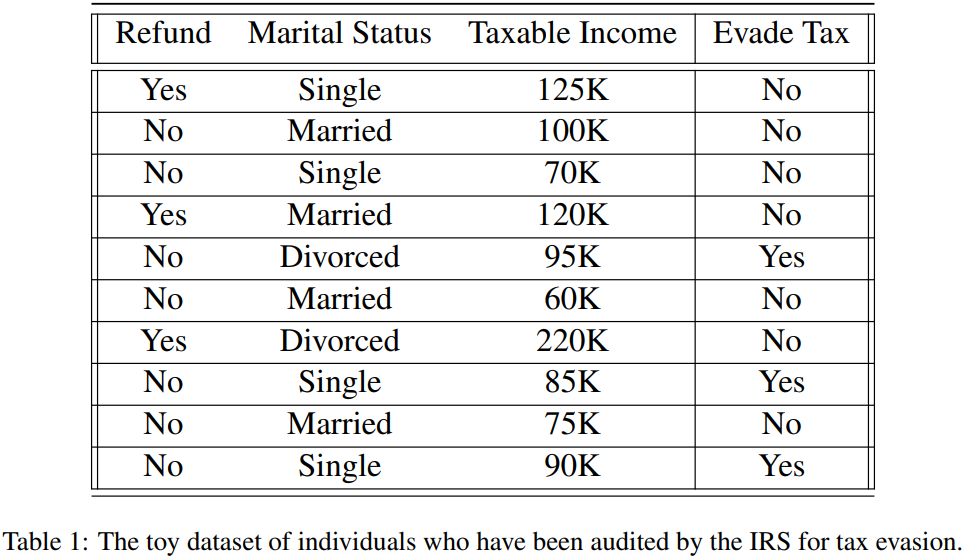

In [11]:
display(Image(filename="table_1.png"))

## Question 3 Answer

Calculate $\text{P(Evade Tax|Refund=Yes, Marital Status=Married, Taxable Income=79k)}$, assuming that Laplace smoothing is not used (as per clarifications with Prof Zhao Na):

| **Evade Tax** \\ **Refund** | Yes | No  |
| :------------------------: | :-: | :-: |
|            Yes             |  0  |  3  |
|             No             |  3  |  4  |

</br>

| **Evade Tax** \\ **Marital Status** | Single | Married | Divorced |
| :--------------------------------: | :----: | :-----: | :------: |
|                Yes                 |   2    |    0    |    1     |
|                 No                 |   2    |    4    |    1     |

---

Calculating the mean and standard deviation of the continuous variable, Taxable Income:

$\mu_{Yes} = \frac{1}{3} (95+85+90)\times 10^{3} = 90\times 10^{3}$

$\mu_{No} = \frac{1}{7} (125+100+70+120+60+220+75)\times 10^{3} = 110\times 10^{3}$

$\sigma_{Yes}^2 = \frac{1}{2} [(95000-90000)^2+(85000-90000)^2+(90000-90000)^2] = 25 \times 10^{6}$

$\sigma_{No}^2 = \frac{1}{6} [(125000-110000)^2+(100000-110000)^2+(70000-110000)^2+(120000-110000)^2+(60000-110000)^2+(220000-110000)^2+(75000-110000)^2] = 2975\times 10^{6}$

---

$\text{P(Evade Tax=Yes|Refund=Yes, Marital Status=Married, Taxable Income=79k)} = \text{P(Evade Tax=Yes)}\times\text{P(Refund=Yes|Evade Tax=Yes)}\times\text{P(Marital Status=Married|Evade Tax=Yes)}\times\text{P(Taxable Income=79k|Evade Tax=Yes)}$

$\text{P(Evade Tax=Yes)} = \frac{3}{10}$

$\text{P(Refund=Yes|Evade Tax=Yes)} = \frac{0}{3} = 0$

$\text{P(Marital Status=Married|Evade Tax=Yes)} = \frac{0}{3} = 0$

$\text{P(Taxable Income=79k|Evade Tax=Yes)} = \frac{1}{\sqrt{2\pi\sigma_{Yes}^2}}exp(−\frac{(79\times 10^3 -90\times 10^3)^2}{2\sigma_{Yes}^2}) = \frac{1}{\sqrt{2 \pi 25 \times 10^{6}}}exp(−\frac{(79\times 10^3 -90\times 10^3)^2}{2\times 25 \times 10^{6}}) = 7.0949 \times 10^{-6}$

$\text{P(Evade Tax=Yes|Refund=Yes, Marital Status=Married, Taxable Income=79k)} = \frac{3}{10} \times 0 \times 0 \times 7.0949 \times 10^{-6} = 0$

---

Alternatively,
$\text{P(Evade Tax=No|Refund=Yes, Marital Status=Married, Taxable Income=79k)} = \text{P(Evade Tax=No)}\times\text{P(Refund=Yes|Evade Tax=No)}\times\text{P(Marital Status=Married|Evade Tax=No)}\times\text{P(Taxable Income=79k|Evade Tax=No)}$

$\text{P(Evade Tax=No)} = \frac{7}{10}$

$\text{P(Refund=Yes|Evade Tax=No)} = \frac{3}{7} = 0$

$\text{P(Marital Status=Married|Evade Tax=No)} = \frac{4}{7} = 0$

$\text{P(Taxable Income=79k|Evade Tax=No)} = \frac{1}{\sqrt{2\pi\sigma_{No}^2}}exp(−\frac{(79\times 10^3 -110\times 10^3)^2}{2\sigma_{No}^2}) = \frac{1}{\sqrt{2 \pi \times 2975 \times 10^{6}}}exp(−\frac{(79\times 10^3 -110\times 10^3)^2}{2\times 2975 \times 10^{6}}) = 6.223 \times 10^{-6}$

$\text{P(Evade Tax=No|Refund=Yes, Marital Status=Married, Taxable Income=79k)} = \frac{7}{10} \times \frac{3}{7} \times \frac{4}{7} \times 6.223 \times 10^{-6} = 1.07 \times 10^{-6}$

---

Since $\text{P(Evade Tax=No|Refund=Yes, Marital Status=Married, Taxable Income=79k)} > \text{P(Evade Tax=Yes|Refund=Yes, Marital Status=Married, Taxable Income=79k)}$, we predict that the individual is **not likely to evade taxes**.

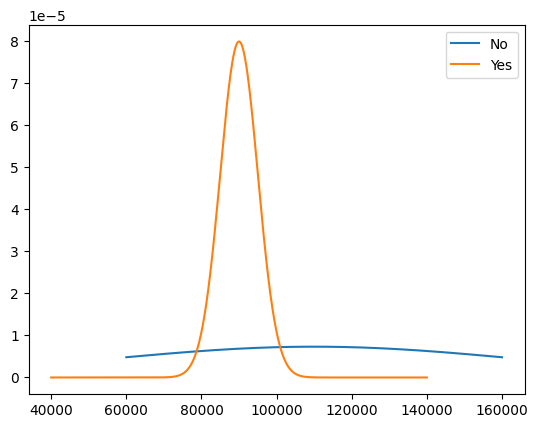

In [15]:
from scipy.stats import norm

range_from_mean = 50000

mean_no = 110000
sd_no = np.sqrt(2975 * 10**6)
x_axis_no = np.arange(-range_from_mean + mean_no, range_from_mean + mean_no, 1)

mean_yes = 90000
sd_yes = np.sqrt(25 * 10**6)
x_axis_yes = np.arange(-range_from_mean + mean_yes, range_from_mean + mean_yes, 1)

plt.plot(x_axis_no, norm.pdf(x_axis_no, mean_no, sd_no), label="No")
plt.plot(x_axis_yes, norm.pdf(x_axis_yes, mean_yes, sd_yes), label="Yes")
plt.legend()
plt.show()

# References
Prof Zhao Na

https://youtu.be/tIeHLnjs5U8

https://www.youtube.com/watch?v=Po6lsacF5pw

https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e

https://neuralthreads.medium.com/softplus-function-smooth-approximation-of-the-relu-function-6a85f92a98e6